In [107]:
from PIL import Image

import torch
from transformers import CLIPProcessor, CLIPModel

import numpy as np

In [108]:
model_id = "openai/clip-vit-base-patch32"
cache_dir = "../models/"

model = CLIPModel.from_pretrained(model_id, cache_dir=cache_dir)
processor = CLIPProcessor.from_pretrained(model_id, cache_dir=cache_dir)

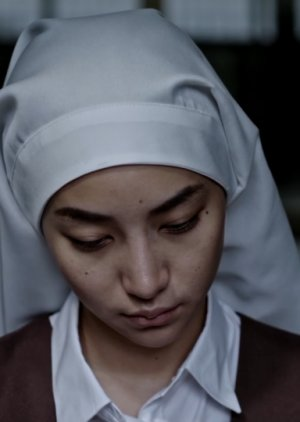

In [140]:
# posterpath = "../data/posters/not_released_yet/27319-the-golden-hairpin_k644m_4c.jpg"
posterpath = "../data/posters/714369-pepero-was-taken-away-on-pepero-day_e4J7K_4c.jpg"
posterpath = "../data/posters/711027-enhypen-en-log_BLYz5_4c.jpg"
posterpath = "../data/posters/693057-siwon-s-fortune-cookie_XND8q_4c.jpg"
posterpath = "../data/posters/77567-fight-for-love_k36Nw_4c.jpg" # China
posterpath = "../data/posters/680631-ka-sunscreen_Rg3oo_4c.jpg" # Thailand
posterpath = "../data/posters/79321-the-serpents-song_BNXKb_4c.jpg" # Thailand
img = Image.open(posterpath)
display(img)

In [141]:
labels = ['China', 'Hong Kong', 'Japan', 'Philippines', 'South Korea', 'Taiwan', 'Thailand']

with torch.no_grad():
    
    inputs = processor(text=labels, images=img, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [143]:
sorted(zip(probs.flatten(), labels), reverse=True)

[(tensor(0.4053), 'South Korea'),
 (tensor(0.2192), 'Japan'),
 (tensor(0.1207), 'China'),
 (tensor(0.1014), 'Hong Kong'),
 (tensor(0.0665), 'Thailand'),
 (tensor(0.0563), 'Philippines'),
 (tensor(0.0305), 'Taiwan')]